# Linear Regression Machine Learning Project for House Price Prediction

### Problem Statement

A real state agent wants the help to predict the house price for regions in the USA.This project aims to support them in making informed decisions and providing precise pricing estimates based on key property features and market conditions.

#### Import Libraries
We will use the following libraries to visualise and analyse our data to understand its structure and format before we do the modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Importing Data

In [2]:
HouseDF = pd.read_csv('USA_Housing.csv') # dataframe

#### Basic Analysis

In [3]:
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [4]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Our data has 7 columns and 5000 rows. This is a good count for our model(considering that it is an assignment, not for industrial use). all the columns are numerical except the **Address** column. In this project, we'll just drop it and work with the 6 numerical features

In [13]:
HouseDF = HouseDF.drop(['Address'],axis=1) # drop the address column
HouseDF.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

Our data has no null values. This is good news because we won't have to do data imputation or dropping the null rows.

### Exploratory Data Analysis 


1. #### Non-Graphical Analysis

In [11]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Kurtosis is the measure of outliers present in the data. 

In [14]:
HouseDF.kurtosis()

Avg. Area Income                0.045574
Avg. Area House Age            -0.083437
Avg. Area Number of Rooms      -0.074652
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.006733
Price                          -0.054918
dtype: float64

**High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers. In this case, our data has no outliers

**Correlation** is a measure of the degree to which two variables change together, if at all.

In [16]:
HouseDF.corr()['Price']

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

**Avg. Area Income** has a Moderate Positive Correlation with the **Price** column. It has the strongest correlation with the target variable(Price). Meanwhile, **Avg. Area Number of Bedrooms** has the weakest correlation with the target variabe

2. ### Graphical Analysis

The relationship between features can also be displayed graphically using a **heatmap**. The Seaborn library will be used for this basic heatmap visualisation. 

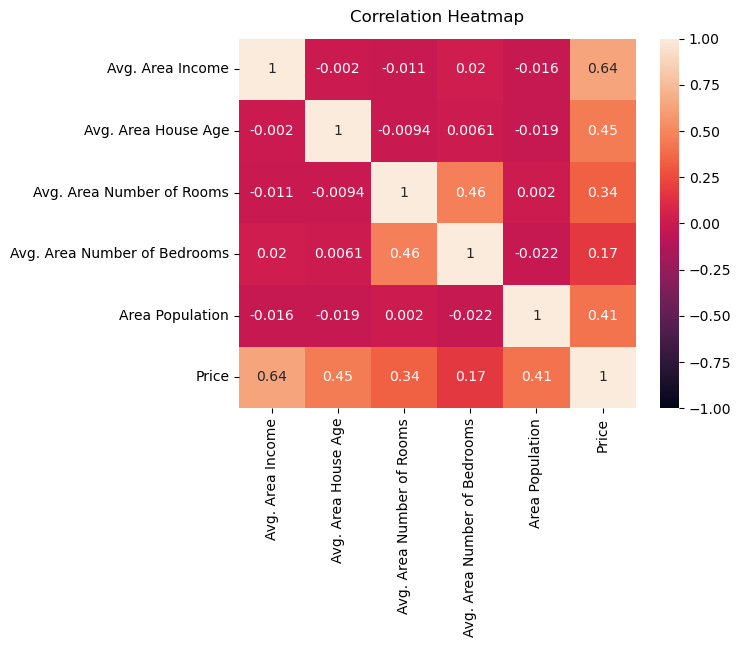

In [17]:
heatmap = sns.heatmap(HouseDF.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

c:\Users\Mutiso\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


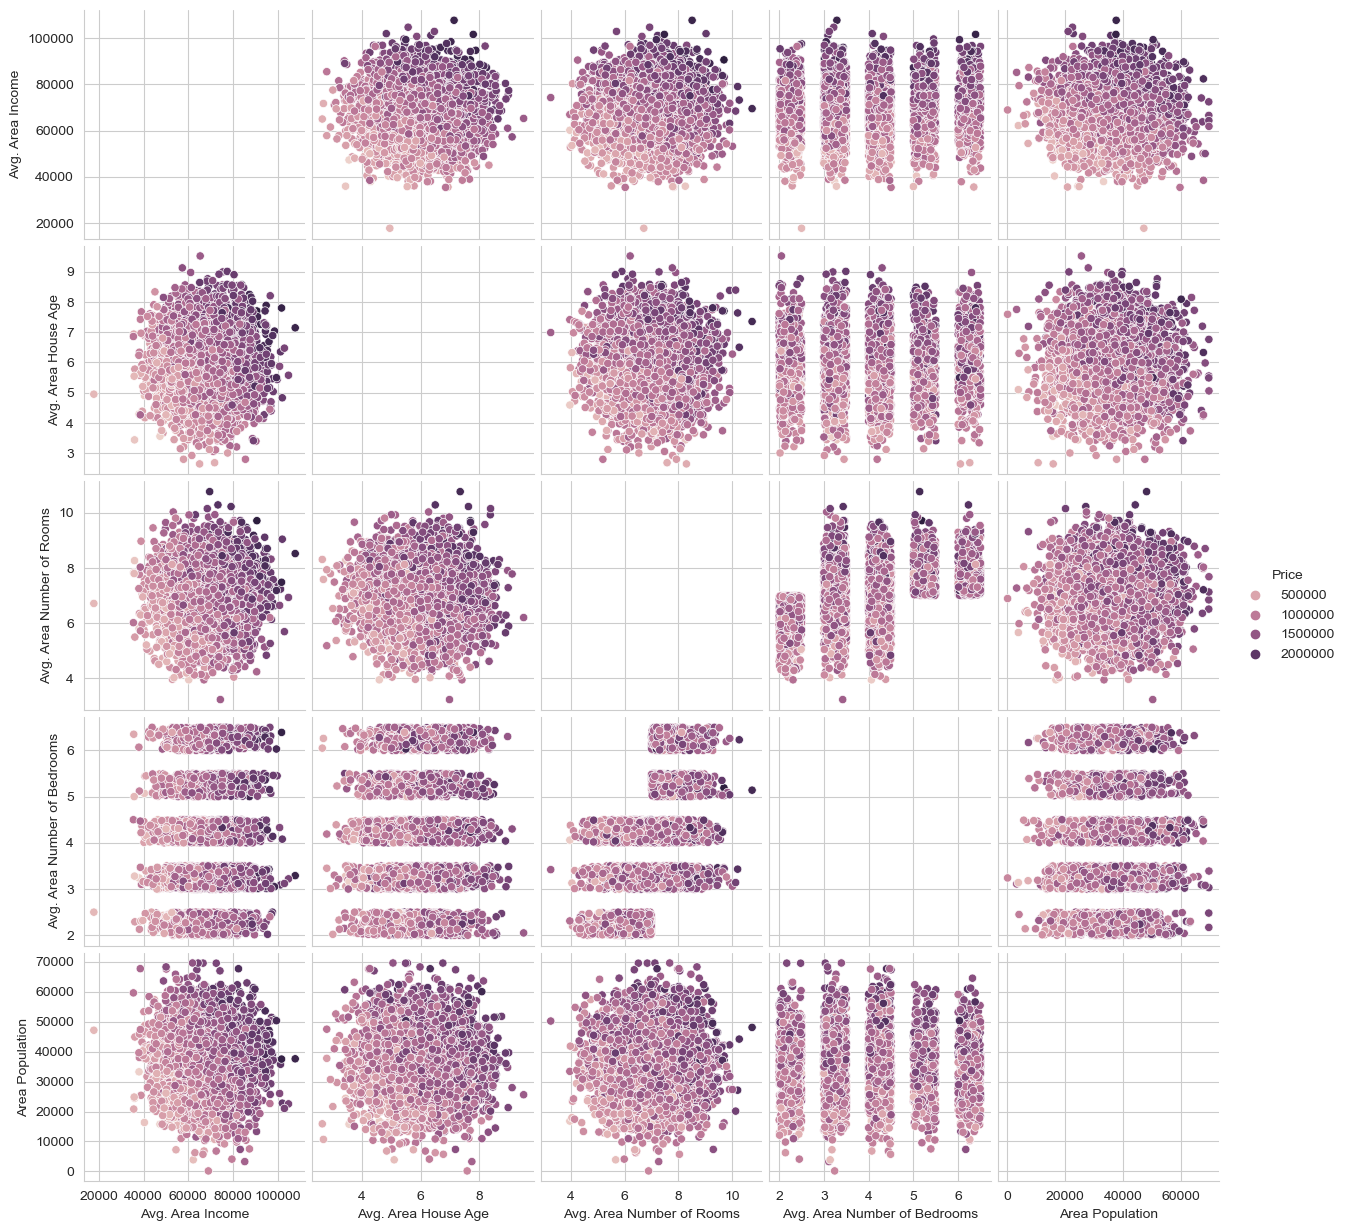

In [19]:
sns.set_style("whitegrid");
sns.pairplot(HouseDF, hue="Price");
plt.show();

#### Training a Linear Regression Model

#### X and y List

In [21]:
X = HouseDF.drop(['Price'], axis=1) # Split the variables. Put the Response features in a one variable

y = HouseDF['Price'] # the target feature

#### Split Data into Train, Test

In modelling, we need two sets of data: Train set and test set. As the name suggests, we use the train set to "teach" the model how to generalise our data. The test set is used during evaluation to show how the model has performed on the data during training.

In [22]:
from sklearn.model_selection import train_test_split # This is a function imported from sklearn to split the data into two sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) # we use 20% of the data as test set. We split the data randomly

#### Importing and Training the LinearRegression Model

In [25]:
from sklearn.linear_model import LinearRegression #Importing the LinearRegression model from sklearn library

In [26]:
lm = LinearRegression() # instantiating the regression model

In [27]:
lm.fit(X_train,y_train) # training the model 

LinearRegression()

#### Model Evaluation

In [29]:
predictions = lm.predict(X_test)

In [30]:
from sklearn import metrics #importing the metrics module to explore the performance of the model
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81305.23300085647
MSE: 10100187858.864885
RMSE: 100499.69083964829


## Predictions from our Linear Regression Model

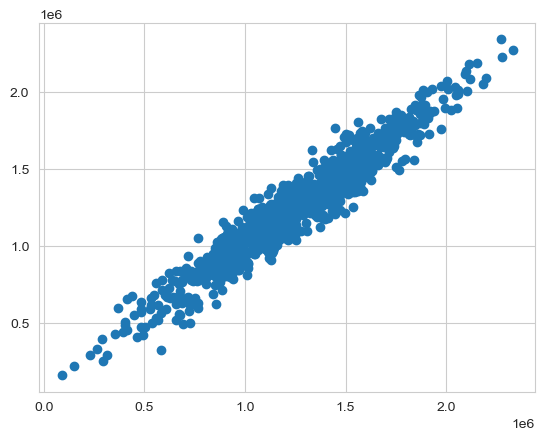

In [31]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

### Iteration

modelling is a process which requires several attempts of training(epochs) to get the best performing model. 

As you may have noticed from the correlation analysis step, the **Avg. Area Number of Bedrooms** column has the weakest correlation with the target variabe. This is a good chance for us to practice a technique called feature selection. Simply put, we will just drop this column and then train our model with the remaining features.

In [33]:
X2 = HouseDF.drop(['Price','Avg. Area Number of Bedrooms'], axis=1) # Split the variables. Put the Response features in a one variable. Drop the 'Avg. Area Number of Bedrooms' column

y2 = HouseDF['Price'] # the target feature
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=101) # we use 20% of the data as test set. We split the data randomly
lm2 = LinearRegression() # instantiating the regression model
lm2.fit(X_train2,y_train2) # training the model 
predictions2 = lm2.predict(X_test2)
print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

MAE: 81251.34759064889
MSE: 10096507277.468454
RMSE: 100481.3777645811
